In [1]:
from matplotlib import ticker
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import datetime
from datetime import date
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader
# Set style for plotting
plt.style.use('fivethirtyeight')

# For reading stock data from yahoo
# from pandas_datareader.data import Datareader # pip install pandas_datareader

# Insert Stock data
# ticker = "AAPL"
start = datetime.now() - relativedelta(years=10) # Get date 10 years ago from today
end = date.today()

# Get the stock quote
df = web.DataReader('TSLA', 'yahoo', start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-13,6.808000,6.570000,6.788000,6.718000,3248000.0,6.718000
2012-04-16,6.740000,6.418000,6.682000,6.450000,5498000.0,6.450000
2012-04-17,6.614000,6.408000,6.486000,6.448000,5577500.0,6.448000
2012-04-18,6.550000,6.306000,6.418000,6.532000,4115500.0,6.532000
2012-04-19,6.686000,6.500000,6.550000,6.632000,3874500.0,6.632000
...,...,...,...,...,...,...
2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010
2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010
2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990


Text(0, 0.5, 'Close Price USD ($)')

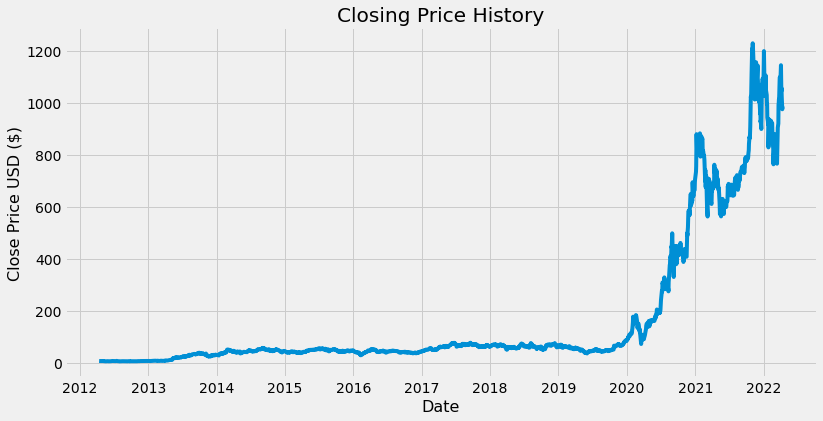

In [2]:
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label = 'TSLA Closing Price History')
plt.title('Closing Price History')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)

In [3]:
# Place moving averages for 10, 30 and 60 days in new columns in the dataframe
ma_day = [10, 30, 60]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  df2 = df
  df2[column_name] = df2['Close'].rolling(ma).mean()

df2

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 30 days,MA for 60 days
Date,,,,,,,,,
2012-04-13,6.808000,6.570000,6.788000,6.718000,3248000.0,6.718000,NaN,NaN,NaN
2012-04-16,6.740000,6.418000,6.682000,6.450000,5498000.0,6.450000,NaN,NaN,NaN
2012-04-17,6.614000,6.408000,6.486000,6.448000,5577500.0,6.448000,NaN,NaN,NaN
2012-04-18,6.550000,6.306000,6.418000,6.532000,4115500.0,6.532000,NaN,NaN,NaN
2012-04-19,6.686000,6.500000,6.550000,6.632000,3874500.0,6.632000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-04-06,1079.000000,1027.699951,1073.469971,1045.760010,29782800.0,1045.760010,1075.461981,929.295323,928.544995
2022-04-07,1076.589966,1021.539978,1052.390015,1057.260010,26482400.0,1057.260010,1079.795984,937.844989,928.425995
2022-04-08,1048.439941,1022.440002,1043.209961,1025.489990,18293300.0,1025.489990,1081.280981,945.032322,927.080495


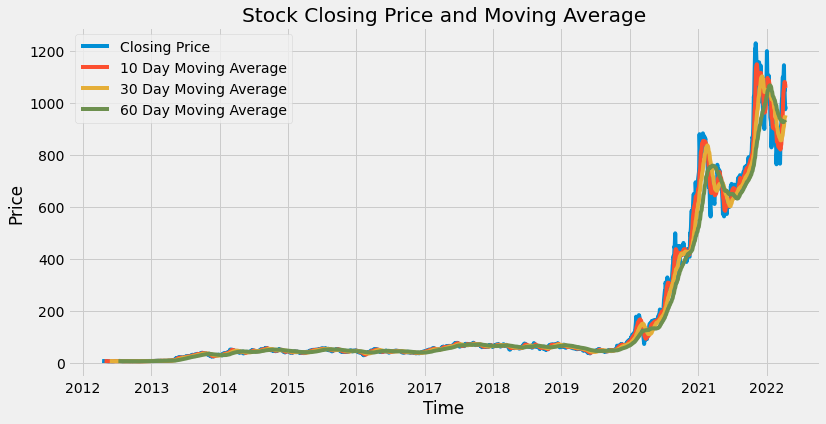

In [4]:
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label='Closing Price')
plt.plot(df["MA for 10 days"], label='10 Day Moving Average')
plt.plot(df["MA for 30 days"], label='30 Day Moving Average')
plt.plot(df["MA for 60 days"], label='60 Day Moving Average')
plt.title("Stock Closing Price and Moving Average")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Create training and test dataset
# Create new dataframe with only Close column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get number of rows to train the model on
training_data_len = int(np.ceil(len(dataset)*.7))
training_data_len

1762

In [19]:
# Scale the data
# !pip install sklearn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00122317],
       [0.00100434],
       [0.0010027 ],
       ...,
       [0.83308426],
       [0.79261688],
       [0.80161509]])

In [20]:
# Create the training dataset
# Create the scaled training into data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Build the LSTM model - (Long short-term memory (LSTM) is an artificial recurrent neural network (RNN))
model = Sequential()
#Ver1
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

#Ver3
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Ver5
# model.add(LSTM(units=50, activation = 'relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=60, activation = 'relu', return_sequences=True))
# model.add(Dropout(0.3))

# model.add(LSTM(units=80, activation = 'relu', return_sequences=True))
# model.add(Dropout(0.4))

# model.add(LSTM(units=120, activation = 'relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units=1))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Wait 45 seconds or so for model fit to run, it will spool up at about 20 seconds

1702/1702 [==============================] - 24s 13ms/step - loss: 2.3374e-05


In [22]:
# Create the testing dataset
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [23]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

42.27433127361401

In [24]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mape

7.397676225640061

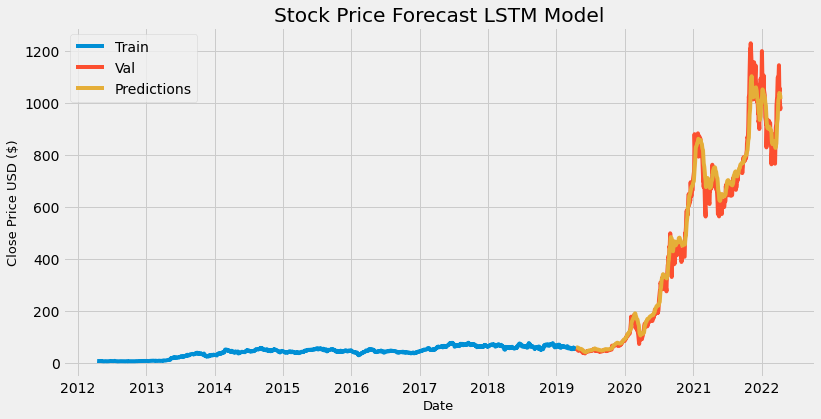

In [25]:
# Remove pandas warning on copy of a slice which is immaterial in this case
pd.options.mode.chained_assignment = None # default='warn'
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('Stock Price Forecast LSTM Model')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Close Price USD ($)', fontsize=13)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [26]:
valid

,Close,Predictions
Date,,
2019-04-16,54.672001,59.518547
2019-04-17,54.245998,59.374699
2019-04-18,54.652000,59.292786
2019-04-22,52.549999,59.299801
2019-04-23,52.779999,59.089558
...,...,...
2022-04-06,1045.760010,1038.621216
2022-04-07,1057.260010,1037.681152
2022-04-08,1025.489990,1034.479858


In [27]:
# Try to predict closing price for next closing price

# Get the quote
# df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2022-04-12')


# Create a new dataframe
new_df = df.filter(['Close'])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
predicted_price = model.predict(X_test)
# Undo the sdcaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[1002.949]]


In [28]:
# Get actual price
actual_price = web.DataReader('TSLA', data_source='yahoo', start='2022-04-12', end='2022-04-12')
print(actual_price['Close'])

Date
2022-04-11    975.929993
2022-04-12    986.950012
Name: Close, dtype: float64


In [29]:
scaler.scale_

array([0.00081653])

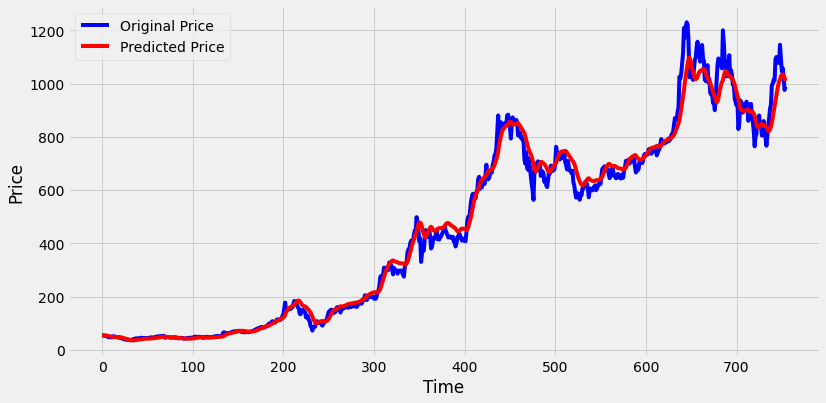

In [30]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
y_predicted = model.predict(x_test)
scale_factor = 1/0.00081653
y_predict0ed = y_predicted * scale_factor
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()